<a href="https://colab.research.google.com/github/vijaygwu/IntroToDeepLearning/blob/main/Spherical_covarianc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spherical covariance**

Spherical covariance is a simplifying assumption that can make our complex models more manageable, at the cost of some potential loss in capturing intricate relationships between variables. It's like using a round cookie cutter on complex dough - you get a clean, simple shape, but you might lose some of the interesting edges.

**Details**
Spherical covariance is a specific type of covariance structure in multivariate statistics. To understand it, let's unpack it step by step:

1. Covariance: This measures how two variables change together. If they tend to increase or decrease in tandem, they have positive covariance. If one goes up when the other goes down, it's negative.

2. In a multivariate setting, we have a covariance matrix that shows how all pairs of variables relate to each other.

3. "Spherical" covariance means that:
   a) All variables have the same variance (σ²)
   b) All pairs of different variables have zero covariance

Mathematically, it looks like this:
σ²I, where I is the identity matrix.

In our online store context, spherical covariance would imply:
1. Each aspect of customer behavior we're measuring (purchase amount, browsing time, etc.) has the same level of variability.
2. These behaviors don't directly influence each other in a linear way.

It's called "spherical" because if you were to plot this in multiple dimensions, the confidence regions would form perfect spheres.

This simplification can make our models more tractable and easier to interpret, though it's often an idealization. In reality, different aspects of customer behavior might have different levels of variability and correlations.




**Visualizing Spherical covariance**

This script does the following:

1. We import necessary libraries: numpy for numerical operations, matplotlib for plotting, and scipy.stats for generating multivariate normal distributions.

2. We define a function `generate_spherical_data` that creates data with spherical covariance.

3. For 2D visualization:
   - We generate 2D data and plot it as a scatter plot.
   - We also plot contour lines to show the probability density.

4. For 3D visualization:
   - We generate 3D data and create a 3D scatter plot.

5. Both plots are shown side by side for comparison.

When you run this script, you'll see two plots:
- On the left, a 2D scatter plot with circular contour lines, illustrating the equal variance in all directions.
- On the right, a 3D scatter plot showing how the points form a spherical cloud around the origin.

This visualization demonstrates that with spherical covariance:
1. The spread of data is the same in all directions (equal variance).
2. There's no correlation between dimensions (the sphere isn't tilted or elongated).

This code provides a concrete way to see what we mean by "spherical" in the context of covariance, which can help in understanding how it simplifies our latent variable model for the online store data.

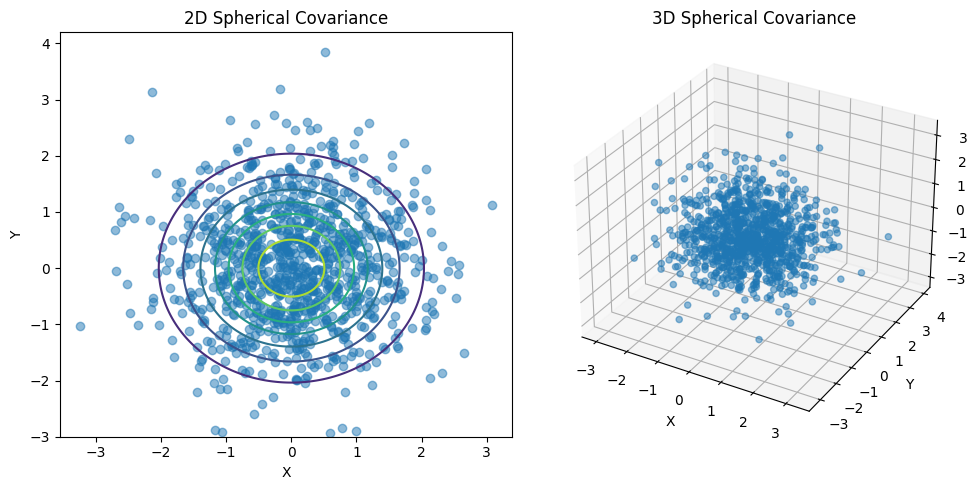

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate data with spherical covariance
def generate_spherical_data(n_samples, n_features, variance):
    mean = np.zeros(n_features)
    cov = variance * np.eye(n_features)  # This creates the spherical covariance
    return np.random.multivariate_normal(mean, cov, n_samples)

# 2D visualization
plt.figure(figsize=(10, 5))

# Generate and plot 2D data
data_2d = generate_spherical_data(1000, 2, 1)
plt.subplot(121)
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5)
plt.title("2D Spherical Covariance")
plt.xlabel("X")
plt.ylabel("Y")

# Plot 2D contour
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])
plt.contour(x, y, rv.pdf(pos))

# 3D visualization
ax = plt.subplot(122, projection='3d')

# Generate and plot 3D data
data_3d = generate_spherical_data(1000, 3, 1)
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], alpha=0.5)
ax.set_title("3D Spherical Covariance")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.show()

**Explanation**

This visualization helps us understand the simplifying assumptions we're making in our latent variable model. It's a balance between model simplicity and the ability to capture complex real-world relationships.

1. 2D Spherical Covariance (Left Plot):
   - Each blue dot represents a data point in 2D space.
   - The circular contour lines (in different colors) show the probability density.
   - The perfect circular shape of these contours is key - it indicates equal variance in all directions.
   - Data points are evenly distributed around the center (0,0), with no obvious skew or elongation in any direction.
   - This circular pattern demonstrates that the variables X and Y are uncorrelated and have the same variance.

2. 3D Spherical Covariance (Right Plot):
   - Each blue dot is now a data point in 3D space.
   - The cloud of points forms a roughly spherical shape.
   - There's no elongation or flattening in any direction, which would indicate different variances or correlations between dimensions.
   - The spherical shape extends equally in all three dimensions (X, Y, and Z).

**Learnings:**

1. Equal Spread: In both 2D and 3D, the data spreads out equally in all directions from the center.
2. No Correlation: There's no apparent relationship between the dimensions - knowing the value in one dimension doesn't give information about the others.
3. Simplicity: This structure simplifies our model by assuming all variables behave similarly and independently.

In the context of our online store:

- Each point could represent a customer interaction.
- The dimensions might be different aspects of customer behavior (e.g., purchase amount, browsing time, items viewed).
- The spherical structure suggests we're treating these aspects as equally variable and uncorrelated in our model.

